In [38]:
# Run the mp_setup.sh bash file (I wasnt sure if we wanted to keep using a notebook)
# Will install mediapipe to the global env

In [39]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image


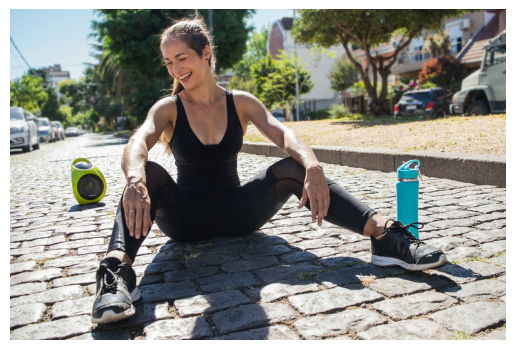

In [40]:
import cv2
import matplotlib.pyplot as plt


def cv2_imshow(image):
    """
    Display an image using matplotlib in Jupyter Notebook.

    Args:
        image: The image to display. Should be in BGR format (OpenCV default).
    """
    # Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide the axis
    plt.show()

girl_img = cv2.imread("sample-frames/mp_example.png")
cv2_imshow(girl_img)

### **Media Pipeline**

In [41]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

def mp_init_detector(model_path='mp-model/pose_landmarker.task'):
    # STEP 2: Create a PoseLandmarker object.
    base_options = python.BaseOptions(model_asset_path=model_path)
    options = vision.PoseLandmarkerOptions(
        base_options=base_options,
        output_segmentation_masks=True)
    return vision.PoseLandmarker.create_from_options(options)

def mp_process_image(detector, img_path):
    image = mp.Image.create_from_file(img_path)

    # Detect features in image
    detection_result = detector.detect(image)

    # Associate enums with string values
    body_parts_dict = {
        'nose': mp.solutions.pose.PoseLandmark.NOSE,
        'left_eye_inner': mp.solutions.pose.PoseLandmark.LEFT_EYE_INNER,
        'left_eye': mp.solutions.pose.PoseLandmark.LEFT_EYE,
        'left_eye_outer': mp.solutions.pose.PoseLandmark.LEFT_EYE_OUTER,
        'right_eye_inner': mp.solutions.pose.PoseLandmark.RIGHT_EYE_INNER,
        'right_eye': mp.solutions.pose.PoseLandmark.RIGHT_EYE,
        'right_eye_outer': mp.solutions.pose.PoseLandmark.RIGHT_EYE_OUTER,
        'left_ear': mp.solutions.pose.PoseLandmark.LEFT_EAR,
        'right_ear': mp.solutions.pose.PoseLandmark.RIGHT_EAR,
        'mouth_left': mp.solutions.pose.PoseLandmark.MOUTH_LEFT,
        'mouth_right': mp.solutions.pose.PoseLandmark.MOUTH_RIGHT,
        'shoulder_left': mp.solutions.pose.PoseLandmark.LEFT_SHOULDER,
        'shoulder_right': mp.solutions.pose.PoseLandmark.RIGHT_SHOULDER,
        'elbow_left': mp.solutions.pose.PoseLandmark.LEFT_ELBOW,
        'elbow_right': mp.solutions.pose.PoseLandmark.RIGHT_ELBOW,
        'wrist_left': mp.solutions.pose.PoseLandmark.LEFT_WRIST,
        'wrist_right': mp.solutions.pose.PoseLandmark.RIGHT_WRIST,
        'pinky_left': mp.solutions.pose.PoseLandmark.LEFT_PINKY,
        'pinky_right': mp.solutions.pose.PoseLandmark.RIGHT_PINKY,
        'index_left': mp.solutions.pose.PoseLandmark.LEFT_INDEX,
        'index_right': mp.solutions.pose.PoseLandmark.RIGHT_INDEX,
        'thumb_left': mp.solutions.pose.PoseLandmark.LEFT_THUMB,
        'thumb_right': mp.solutions.pose.PoseLandmark.RIGHT_THUMB,
        'hip_left': mp.solutions.pose.PoseLandmark.LEFT_HIP,
        'hip_right': mp.solutions.pose.PoseLandmark.RIGHT_HIP,
        'knee_left': mp.solutions.pose.PoseLandmark.LEFT_KNEE,
        'knee_right': mp.solutions.pose.PoseLandmark.RIGHT_KNEE,
        'ankle_left': mp.solutions.pose.PoseLandmark.LEFT_ANKLE,
        'ankle_right': mp.solutions.pose.PoseLandmark.RIGHT_ANKLE,
        'heel_left': mp.solutions.pose.PoseLandmark.LEFT_HEEL,
        'heel_right': mp.solutions.pose.PoseLandmark.RIGHT_HEEL,
        'foot_index_left': mp.solutions.pose.PoseLandmark.LEFT_FOOT_INDEX,
        'foot_index_right': mp.solutions.pose.PoseLandmark.RIGHT_FOOT_INDEX
    }

    # Create a dictonary so we can index into body parts
    # EX Usage: body_parts['ankle_left]
    body_parts = {}
    if detection_result.pose_landmarks:
        for pose_landmarks in detection_result.pose_landmarks:
            for part_name, part_enum in body_parts_dict.items():
                body_parts[part_name] = pose_landmarks[part_enum]

    return detection_result, body_parts

def mp_debug_show_image(detector, img_path):
    detection_result, _ = mp_process_image(detector, img_path)
    image = mp.Image.create_from_file(img_path)

    # STEP 5: Process the detection result. In this case, visualize it.
    annotated_image = draw_landmarks_on_image(
        image.numpy_view(),
        detection_result
    )

    # Display the annotated image
    cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))


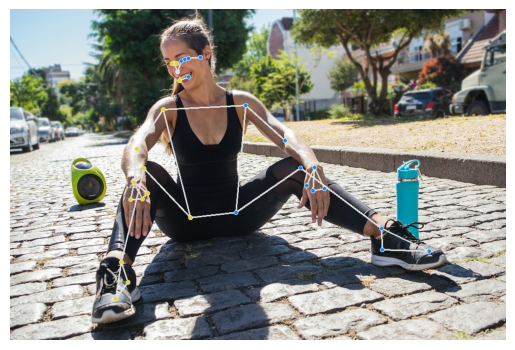

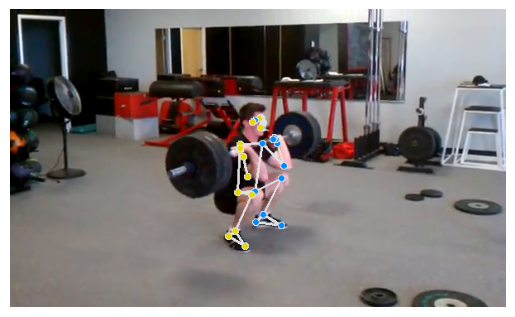

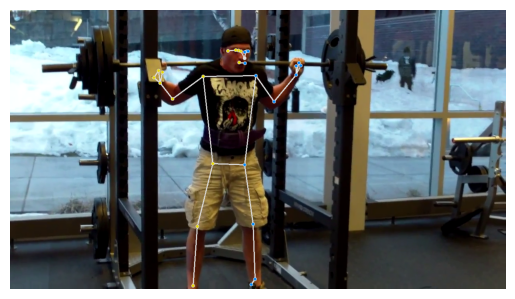

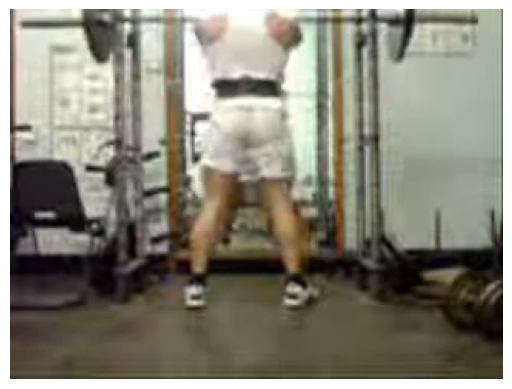

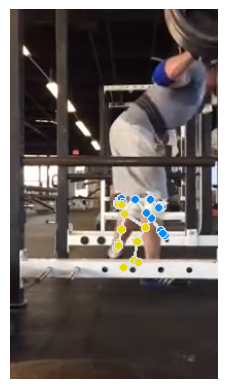

In [44]:
# Usage
mp_detector = mp_init_detector()
detection_results, body_parts = mp_process_image(
    mp_detector,
    "sample-frames/mp_example.png"
)

# Debug
mp_debug_show_image(mp_detector, "sample-frames/mp_example.png")
mp_debug_show_image(mp_detector,"sample-frames/good1.png")
mp_debug_show_image(mp_detector,"sample-frames/good2.png")

mp_debug_show_image(mp_detector,"sample-frames/bad1.png")
mp_debug_show_image(mp_detector,"sample-frames/bad2.png")